In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x[0] + x[1] + x[0]*x[1]

def h(x):
    return (x[0]**2 ) + (x[1]**2 ) - 2**2

In [3]:
def interior_point_method(f,h,x,k_max=100, d=1, y=1.5, e=1e-4):
    x_it = [x]
    
    for k in range(k_max):
        # Definir la función de penalización con la barrera
        p = lambda x: f(x) + 1/d * (-1)*(1/h(x))  # Método de barrera

        # Minimizar p(x)
        xk = minimize(p, x).x
        x_it.append(xk)
        
        # Incrementar el parámetro de penalización (reduce la influencia de la barrera)
        d *= y

        # Condición de parada utilizando la norma euclidiana
        if np.linalg.norm(x - xk) < e:
            break
        
        # Actualizar x para la siguiente iteración
        x = xk
    return xk, x_it

In [10]:
x0, x_it = interior_point_method(f,h,[0.1,0.1])
x0, x_it


(array([-0.99989983, -0.99989983]),
 [[0.1, 0.1],
  array([-0.79077586, -0.79077586]),
  array([-0.83562222, -0.83562222]),
  array([-0.87326288, -0.87326288]),
  array([-0.90418944, -0.90418944]),
  array([-0.92901526, -0.92901526]),
  array([-0.94843401, -0.94843401]),
  array([-0.96322152, -0.96322152]),
  array([-0.97418387, -0.97418387]),
  array([-0.98212667, -0.98212667]),
  array([-0.98775595, -0.98775595]),
  array([-0.99167935, -0.99167935]),
  array([-0.99437871, -0.99437871]),
  array([-0.99621821, -0.99621821]),
  array([-0.99746318, -0.99746318]),
  array([-0.99830878, -0.99830878]),
  array([-0.99886776, -0.99886776]),
  array([-0.99924308, -0.99924308]),
  array([-0.99949443, -0.99949443]),
  array([-0.99966253, -0.99966253]),
  array([-0.99977484, -0.99977484]),
  array([-0.99984981, -0.99984981]),
  array([-0.99989983, -0.99989983])])

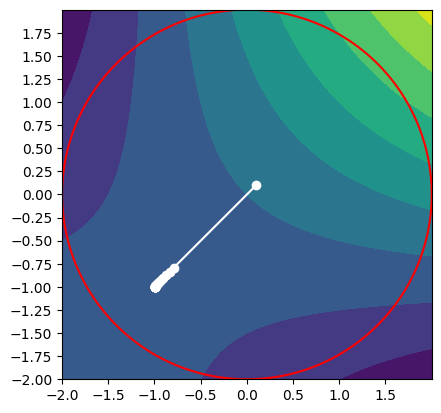

In [8]:
# Define range for input
r_min, r_max = -2, 2

xaxis = np.linspace(r_min, r_max, 200)
yaxis = np.linspace(r_min, r_max, 200)

x, y = np.meshgrid(xaxis, yaxis)

z = f([x,y])

x_it = np.array(x_it)

plt.contourf(x, y, z, levels=10, cmap='viridis')
plt.plot()

X = np.linspace(r_min, r_max, 200)
Y = np.linspace(r_min, r_max, 200)

x0, x1 = np.meshgrid(X,Y)

H = x0**2 + x1**2  -2**2

plt.contour(x0, x1, H, levels=[0], colors='r')

#plt.plot(X, Y, color="r")
plt.plot(x_it[:, 0], x_it[:, 1], 'o-', color='w')

plt.xlim(r_min, r_max)
plt.ylim(r_min, r_max)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(np.arange(min(xaxis), max(xaxis), 0.5))
plt.yticks(np.arange(min(yaxis), max(yaxis), 0.25))

#plt.grid(True, linewidth=0.45, linestyle='--', color='magenta') 

plt.show()